In [3]:
import json
import numpy as np

In [4]:
json_path = 'train_data/dqn_test/q_values_log.json'
# load into dict
with open(json_path, 'r') as f:
    q_values = json.load(f)


In [5]:
train_log_path = 'train_data/dqn_test/training_logs.json'
with open(train_log_path, 'r') as f:
    train_logs = json.load(f)

In [6]:
len(train_logs['episode_lengths'])

300

In [7]:
frames_count = 0
episode_till = 250
for i in range(episode_till):
    frames_count += train_logs['episode_lengths'][i]

print(frames_count, train_logs['episode_lengths'][episode_till])

23122 144


In [8]:
len(q_values['target_q_values'])

36617

In [9]:
q_values.keys()

dict_keys(['target_q_values', 'current_q_values', 'next_q_values', 'dones', 'td_errors'])

In [10]:
new_q_values = {}
new_q_values = q_values.keys()

In [11]:
print

<function print>

In [12]:
print(q_values['td_errors'][frames_count])


[[0.2709503173828125], [0.3871002197265625], [0.023540019989013672], [1.6342506408691406], [0.12254714965820312], [0.08637237548828125], [0.398895263671875], [0.36985015869140625], [0.0219879150390625], [0.08665847778320312], [0.3817739486694336], [0.5167465209960938], [0.1975555419921875], [0.3755645751953125], [0.313995361328125], [0.22771453857421875], [0.28566741943359375], [0.1212158203125], [0.191986083984375], [0.10936737060546875], [0.26331329345703125], [0.24333572387695312], [0.27166748046875], [1.8191502094268799], [0.20223617553710938], [0.11658477783203125], [0.09508514404296875], [0.16411304473876953], [0.32349395751953125], [0.0850677490234375], [0.057849884033203125], [0.5013084411621094], [0.15482330322265625], [0.18129730224609375], [0.01438140869140625], [0.114166259765625], [0.15778350830078125], [0.3365030288696289], [0.4903068542480469], [0.3403778076171875], [0.2768745422363281], [0.05145263671875], [0.27338409423828125], [0.4388275146484375], [0.3967094421386719

In [13]:
for key in q_values.keys():
    for i in range(len(q_values[key])):
        for j in range(len(q_values[key][i])):
            q_values[key][i][j] = q_values[key][i][j][0]
        q_values[key][i] = np.mean(q_values[key][i])
            

In [14]:
target_q_values_list = [0 for _ in range(len(train_logs['episode_lengths']))]
frames_so_far = 0

flag = 0
for i in range(len(train_logs['episode_lengths'])):
    frames = train_logs['episode_lengths'][i]
    frames_so_far += frames
    if flag == 0:
        if frames_so_far < 64:
            continue
        else:
            flag = 1
            skipped_frames = frames_so_far - 64
            target_q_values_list[i] = np.mean(q_values['target_q_values'][:skipped_frames])
    else:
        target_q_values_list[i] = np.mean(q_values['target_q_values'][frames_so_far - frames:frames_so_far])

In [15]:
current_q_values_list = [0 for _ in range(len(train_logs['episode_lengths']))]
frames_so_far = 0

flag = 0
for i in range(len(train_logs['episode_lengths'])):
    frames = train_logs['episode_lengths'][i]
    frames_so_far += frames
    if flag == 0:
        if frames_so_far < 64:
            continue
        else:
            flag = 1
            skipped_frames = frames_so_far - 64
            current_q_values_list[i] = np.mean(q_values['current_q_values'][:skipped_frames])
    else:
        current_q_values_list[i] = np.mean(q_values['current_q_values'][frames_so_far - frames:frames_so_far])

In [16]:
next_q_values_list = [0 for _ in range(len(train_logs['episode_lengths']))]
frames_so_far = 0

flag = 0
for i in range(len(train_logs['episode_lengths'])):
    frames = train_logs['episode_lengths'][i]
    frames_so_far += frames
    if flag == 0:
        if frames_so_far < 64:
            continue
        else:
            flag = 1
            skipped_frames = frames_so_far - 64
            next_q_values_list[i] = np.mean(q_values['next_q_values'][:skipped_frames])
    else:
        next_q_values_list[i] = np.mean(q_values['next_q_values'][frames_so_far - frames:frames_so_far])

In [17]:
td_errors_list = [0 for _ in range(len(train_logs['episode_lengths']))]
frames_so_far = 0

flag = 0
for i in range(len(train_logs['episode_lengths'])):
    frames = train_logs['episode_lengths'][i]
    frames_so_far += frames
    if flag == 0:
        if frames_so_far < 64:
            continue
        else:
            flag = 1
            skipped_frames = frames_so_far - 64
            td_errors_list[i] = np.mean(q_values['td_errors'][:skipped_frames])
    else:
        td_errors_list[i] = np.mean(q_values['td_errors'][frames_so_far - frames:frames_so_far])

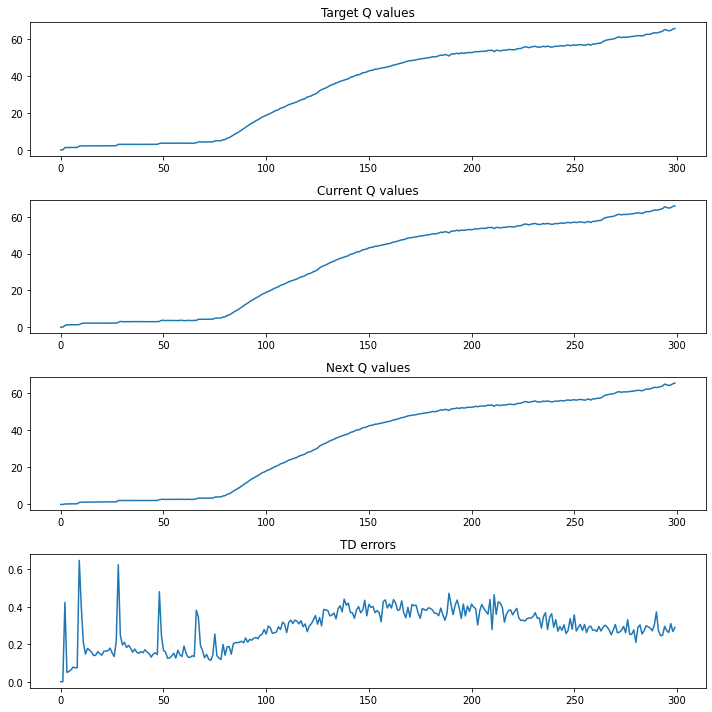

In [18]:
import matplotlib.pyplot as plt

# axes subplot with all 4 lists in different axes
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ax[0].plot(target_q_values_list)
ax[0].set_title('Target Q values')
ax[1].plot(current_q_values_list)
ax[1].set_title('Current Q values')
ax[2].plot(next_q_values_list)
ax[2].set_title('Next Q values')
ax[3].plot(td_errors_list)
ax[3].set_title('TD errors')
fig.tight_layout()


In [19]:
# 